In [1]:
import math
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
import re
import seaborn as sns
import pandas as pd
import random
from scipy import stats  #t-test
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
from scipy.interpolate import interp1d
import statsmodels.api as sm
from statsmodels.stats import multitest

import statsmodels.formula.api as smf
import statsmodels.api as sm

C:\Users\ljr\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
pathfasfa1 = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\fasfa"
filesfasfa1= os.listdir(pathfasfa1)
pathfasfa2 = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\fasfa"
filesfasfa2= os.listdir(pathfasfa2)
pathfasfa3 = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\fasfa"
filesfasfa3= os.listdir(pathfasfa3)
pathfasfa4 = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\fasfa"
filesfasfa4= os.listdir(pathfasfa4)
pathfasfa5 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\fasfa"
filesfasfa5= os.listdir(pathfasfa5)
pathfasfa6 = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\fasfa"
filesfasfa6= os.listdir(pathfasfa6)
pathfasfa7 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\fasfa"
filesfasfa7= os.listdir(pathfasfa7)
pathfasfa8 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\fasfa"
filesfasfa8= os.listdir(pathfasfa8)
pathfasfa9 = r"C:\LJR\babylab\marisa\datamanual\cut\8787\turntaking\fasfa"
filesfasfa9= os.listdir(pathfasfa9)

pathfaschi1 = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\faschi"
filesfaschi1= os.listdir(pathfaschi1)
pathfaschi2 = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\faschi"
filesfaschi2= os.listdir(pathfaschi2)
pathfaschi3 = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\faschi"
filesfaschi3= os.listdir(pathfaschi3)
pathfaschi4 = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\faschi"
filesfaschi4= os.listdir(pathfaschi4)
pathfaschi5 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\faschi"
filesfaschi5= os.listdir(pathfaschi5)
pathfaschi6 = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\faschi"
filesfaschi6= os.listdir(pathfaschi6)
pathfaschi7 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\faschi"
filesfaschi7= os.listdir(pathfaschi7)
pathfaschi8 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\faschi"
filesfaschi8= os.listdir(pathfaschi8)
pathfaschi9 = r"C:\LJR\babylab\marisa\datamanual\cut\8787\turntaking\faschi"
filesfaschi9= os.listdir(pathfaschi9)

In [3]:
pathfaother1 = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\faother"
filesfaother1= os.listdir(pathfaother1)
pathfaother2 = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\faother"
filesfaother2= os.listdir(pathfaother2)
pathfaother3 = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\faother"
filesfaother3= os.listdir(pathfaother3)
pathfaother4 = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\faother"
filesfaother4= os.listdir(pathfaother4)
pathfaother5 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\faother"
filesfaother5= os.listdir(pathfaother5)
pathfaother6 = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\faother"
filesfaother6= os.listdir(pathfaother6)
pathfaother7 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\faother"
filesfaother7= os.listdir(pathfaother7)
pathfaother8 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\faother"
filesfaother8= os.listdir(pathfaother8)
pathfaother9 = r"C:\LJR\babylab\marisa\datamanual\cut\8787\turntaking\faother"
filesfaother9= os.listdir(pathfaother9)

pathchiother1 = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\chiother"
fileschiother1= os.listdir(pathchiother1)
pathchiother2 = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\chiother"
fileschiother2= os.listdir(pathchiother2)
pathchiother3 = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\chiother"
fileschiother3= os.listdir(pathchiother3)
pathchiother4 = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\chiother"
fileschiother4= os.listdir(pathchiother4)
pathchiother5 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\chiother"
fileschiother5= os.listdir(pathchiother5)
pathchiother6 = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\chiother"
fileschiother6= os.listdir(pathchiother6)
pathchiother7 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\chiother"
fileschiother7= os.listdir(pathchiother7)
pathchiother8 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\chiother"
fileschiother8= os.listdir(pathchiother8)
pathchiother9 = r"C:\LJR\babylab\marisa\datamanual\cut\8787\turntaking\chiother"
fileschiother9= os.listdir(pathchiother9)

In [4]:
pathchisfa1 = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\chisfa"
fileschisfa1= os.listdir(pathchisfa1)
pathchisfa2 = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\chisfa"
fileschisfa2= os.listdir(pathchisfa2)
pathchisfa3 = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\chisfa"
fileschisfa3= os.listdir(pathchisfa3)
pathchisfa4 = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\chisfa"
fileschisfa4= os.listdir(pathchisfa4)
pathchisfa5 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\chisfa"
fileschisfa5= os.listdir(pathchisfa5)
pathchisfa6 = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\chisfa"
fileschisfa6= os.listdir(pathchisfa6)
pathchisfa7 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\chisfa"
fileschisfa7= os.listdir(pathchisfa7)
pathchisfa8 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\chisfa"
fileschisfa8= os.listdir(pathchisfa8)
pathchisfa9 = r"C:\LJR\babylab\marisa\datamanual\cut\8787\turntaking\chisfa"
fileschisfa9= os.listdir(pathchisfa9)

pathchischi1 = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\chischi"
fileschischi1= os.listdir(pathchischi1)
pathchischi2 = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\chischi"
fileschischi2= os.listdir(pathchischi2)
pathchischi3= r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\chischi"
fileschischi3= os.listdir(pathchischi3)
pathchischi4 = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\chischi"
fileschischi4= os.listdir(pathchischi4)
pathchischi5 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\chischi"
fileschischi5= os.listdir(pathchischi5)
pathchischi6 = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\chischi"
fileschischi6= os.listdir(pathchischi6)
pathchischi7 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\chischi"
fileschischi7= os.listdir(pathchischi7)
pathchischi8 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\chischi"
fileschischi8= os.listdir(pathchischi8)
pathchischi9 = r"C:\LJR\babylab\marisa\datamanual\cut\8787\turntaking\chischi"
fileschischi9= os.listdir(pathchischi9)


In [5]:
filesfasfa1.sort(key = lambda x:float(x[1:-4]))
filesfasfa2.sort(key = lambda x:float(x[1:-4]))
filesfasfa3.sort(key = lambda x:float(x[1:-4]))
filesfasfa4.sort(key = lambda x:float(x[1:-4]))
filesfasfa5.sort(key = lambda x:float(x[1:-4]))
filesfasfa6.sort(key = lambda x:float(x[1:-4]))
filesfasfa7.sort(key = lambda x:float(x[1:-4]))
filesfasfa8.sort(key = lambda x:float(x[1:-4]))
filesfasfa9.sort(key = lambda x:float(x[1:-4]))

In [6]:
filesfaschi1.sort(key = lambda x:float(x[:-4]))
filesfaschi2.sort(key = lambda x:float(x[:-4]))
filesfaschi3.sort(key = lambda x:float(x[:-4]))
filesfaschi4.sort(key = lambda x:float(x[:-4]))
filesfaschi5.sort(key = lambda x:float(x[:-4]))
filesfaschi6.sort(key = lambda x:float(x[:-4]))
filesfaschi7.sort(key = lambda x:float(x[:-4]))
filesfaschi8.sort(key = lambda x:float(x[:-4]))
filesfaschi9.sort(key = lambda x:float(x[:-4]))

In [7]:
def maxpitch(path,files):
    maxminpitchs=np.zeros((len(files),2))
    for i in range(len(files)):
        x,sr1=librosa.load(path+"\\"+files[i],sr=None)
        f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr1,frame_length=512, fill_na=np.nan, n_thresholds=50, fmin=120, fmax=600)
        maxminpitchs[i,0]=np.nanmax(f0)
        maxminpitchs[i,1]=np.nanmin(f0)
    maxminpitch=np.r_[np.max(maxminpitchs),np.min(maxminpitchs)]
    return maxminpitch

In [8]:
def maxpitchi(path,files):
    maxminpitchs=np.zeros((len(files),2))
    for i in range(len(files)):
        x,sr1=librosa.load(path+"\\"+files[i],sr=None)
        f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr1,frame_length=512, fill_na=np.nan, n_thresholds=50, fmin=120, fmax=1000)
        maxminpitchs[i,0]=np.nanmax(f0)
        maxminpitchs[i,1]=np.nanmin(f0)
    maxminpitch=np.r_[np.max(maxminpitchs),np.min(maxminpitchs)]
    return maxminpitch

In [9]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [10]:
def normalizea(x,maxa,mina, axis=0):
    return [(float(i)-mina)/float(maxa-mina) for i in x]

In [11]:
def normalizei(x,maxi,mini, axis=0):
    return [(float(i)-mini)/float(maxi-mini) for i in x]

In [12]:
def f0fitintera(path,files,maxa,mina):
    x,sr1=librosa.load(path+"\\"+files,sr=None)
    f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr1,frame_length=512, fill_na=np.nan, n_thresholds=50, fmin=120, fmax=600)
    times = librosa.times_like(f0,sr=sr1,hop_length=128)
    duration=librosa.get_duration(y=x, sr=sr1)
    #for k in range(len(f0)-1):
        #if (k!=0):
            #if (np.isnan(f0[k-1]))and(np.isnan(f0[k+1])):
                #f0[k]=np.nan
        #if (~np.isnan(f0[-1]))and(np.isnan(f0[-2])):
            #f0[-1]=np.nan
    #logf0=np.log(f0)
    #logf0nomal=normalize(logf0)
    logf0nomal=normalizea(f0,maxa,mina)
    timesp=pd.DataFrame(times)
    logf0nomalp=pd.DataFrame(logf0nomal)
    indxnan = logf0nomalp.fillna(method='ffill').dropna().index
    res_idx = logf0nomalp.loc[indxnan].fillna(method='bfill').dropna().index
    f0out=logf0nomalp.loc[res_idx]
    timesout = timesp.loc[res_idx]
    timesout=timesout-timesout.min()
    timesnumpy=timesout.to_numpy()
    f0outnumpy=f0out.to_numpy()
    logf0nomalnan = f0outnumpy[~np.isnan(f0outnumpy)]
    timesnan = timesnumpy[~np.isnan(f0outnumpy)]
    #xx = np.linspace(timesnumpy.min(), timesnumpy.max(), 50) 
    f = interp1d(timesnan, logf0nomalnan,kind='slinear',fill_value="extrapolate")
    ynew=f(timesnumpy)
    #ynew=f(xx)
    return ynew

In [13]:
def f0fitinteri(path,files,maxi,mini):
    x,sr1=librosa.load(path+"\\"+files,sr=None)
    f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr1,frame_length=512, fill_na=np.nan, n_thresholds=50, fmin=120, fmax=1000)
    times = librosa.times_like(f0,sr=sr1,hop_length=128)
    duration=librosa.get_duration(y=x, sr=sr1)
    #for k in range(len(f0)-1):
        #if (k!=0):
            #if (np.isnan(f0[k-1]))and(np.isnan(f0[k+1])):
                #f0[k]=np.nan
        #if (~np.isnan(f0[-1]))and(np.isnan(f0[-2])):
            #f0[-1]=np.nan
    #logf0=np.log(f0)
    #logf0nomal=normalize(logf0)
    logf0nomal=normalizei(f0,maxi,mini)
    timesp=pd.DataFrame(times)
    logf0nomalp=pd.DataFrame(logf0nomal)
    indxnan = logf0nomalp.fillna(method='ffill').dropna().index
    res_idx = logf0nomalp.loc[indxnan].fillna(method='bfill').dropna().index
    f0out=logf0nomalp.loc[res_idx]
    timesout = timesp.loc[res_idx]
    timesout=timesout-timesout.min()
    timesnumpy=timesout.to_numpy()
    f0outnumpy=f0out.to_numpy()
    logf0nomalnan = f0outnumpy[~np.isnan(f0outnumpy)]
    timesnan = timesnumpy[~np.isnan(f0outnumpy)]
    #xx = np.linspace(timesnumpy.min(), timesnumpy.max(), 50)
    f = interp1d(timesnan, logf0nomalnan,kind='slinear',fill_value="extrapolate")
    ynew=f(timesnumpy)
    #ynew=f(xx)
    return ynew

In [14]:
def dtwdcalculatefas(patha,filesa,pathi,filesi,maxa,mina,maxi,mini):
    dtwd=np.zeros((len(filesa),2))
    for i in range(len(filesa)):
        ynewfa=f0fitintera(patha,filesa[i],maxa,mina)
        ynewchi=f0fitinteri(pathi,filesi[i],maxi,mini)
        distance,path = fastdtw(ynewfa,ynewchi,dist=euclidean)
        meandistance = distance/(len(ynewchi))
        dtwd[i,:]=np.c_[distance,meandistance]
    return dtwd

In [15]:
dtwd1= dtwdcalculatefas(pathfasfa1,filesfasfa1,pathfaschi1,filesfaschi1,590,120,999.6,120)
dtwd2= dtwdcalculatefas(pathfasfa2,filesfasfa2,pathfaschi2,filesfaschi2,597.8,120,999.6,120)
#dtwd3= dtwdcalculatefas(pathfasfa3,filesfasfa3,pathfaschi3,filesfaschi3,557.8,120,999.6,120)
#dtwd4= dtwdcalculatefas(pathfasfa4,filesfasfa4,pathfaschi4,filesfaschi4,551.38,120,971.2,120)
#dtwd5= dtwdcalculatefas(pathfasfa5,filesfasfa5,pathfaschi5,filesfaschi5,597.82,120,999.6,120)
dtwd6= dtwdcalculatefas(pathfasfa6,filesfasfa6,pathfaschi6,filesfaschi6,590.94,122.1,999.6,120)
dtwd7= dtwdcalculatefas(pathfasfa7,filesfasfa7,pathfaschi7,filesfaschi7,597.82,120,999.6,120)
dtwd8= dtwdcalculatefas(pathfasfa8,filesfasfa8,pathfaschi8,filesfaschi8,597.82,120,999.6,120)
dtwd9= dtwdcalculatefas(pathfasfa9,filesfasfa9,pathfaschi9,filesfaschi9,597.82,120,999.6,120)

In [16]:
def randomid (filesr,filest):
    idrr1=[random.randint(0,len(filesr)-1) for _ in range (len(filest))]
    idrr2=[random.randint(0,len(filesr)-1) for _ in range (len(filest))]
    idrr3=[random.randint(0,len(filesr)-1) for _ in range (len(filest))]
    idrr4=[random.randint(0,len(filesr)-1) for _ in range (len(filest))]
    idrr5=[random.randint(0,len(filesr)-1) for _ in range (len(filest))]
    idr=np.c_[idrr1,idrr2,idrr3,idrr4,idrr5]
    return idr

In [17]:
idrfaschi1=randomid(fileschiother1,filesfaschi1)
idrfaschi2=randomid(fileschiother2,filesfaschi2)
#idrfaschi3=randomid(fileschiother3,filesfaschi3)
#idrfaschi4=randomid(fileschiother4,filesfaschi4)
#idrfaschi5=randomid(fileschiother5,filesfaschi5)
idrfaschi6=randomid(fileschiother6,filesfaschi6)
idrfaschi7=randomid(fileschiother7,filesfaschi7)
idrfaschi8=randomid(fileschiother8,filesfaschi8)
idrfaschi9=randomid(fileschiother9,filesfaschi9)

In [18]:
def rfiler(filesr,idr):
    filesrr1=np.array(filesr)[idr[:,0]]
    filesrr2=np.array(filesr)[idr[:,1]]
    filesrr3=np.array(filesr)[idr[:,2]]
    filesrr4=np.array(filesr)[idr[:,3]]
    filesrr5=np.array(filesr)[idr[:,4]]
    filesrr=np.c_[filesrr1,filesrr2,filesrr3,filesrr4,filesrr5]
    return filesrr

In [19]:
filesrrfaschi1=rfiler(fileschiother1,idrfaschi1)
filesrrfaschi2=rfiler(fileschiother2,idrfaschi2)
#filesrrfaschi3=rfiler(fileschiother3,idrfaschi3)
#filesrrfaschi4=rfiler(fileschiother4,idrfaschi4)
#filesrrfaschi5=rfiler(fileschiother5,idrfaschi5)
filesrrfaschi6=rfiler(fileschiother6,idrfaschi6)
filesrrfaschi7=rfiler(fileschiother7,idrfaschi7)
filesrrfaschi8=rfiler(fileschiother8,idrfaschi8)
filesrrfaschi9=rfiler(fileschiother9,idrfaschi9)

In [20]:
r1fa=dtwdcalculatefas(pathfasfa1,filesfasfa1,pathchiother1,filesrrfaschi1[:,0],590,120,999.6,120)
r2fa=dtwdcalculatefas(pathfasfa2,filesfasfa2,pathchiother2,filesrrfaschi2[:,0],597.8,120,999.6,120)
r6fa=dtwdcalculatefas(pathfasfa6,filesfasfa6,pathchiother6,filesrrfaschi6[:,0],590.94,122.1,999.6,120)
r7fa=dtwdcalculatefas(pathfasfa7,filesfasfa7,pathchiother7,filesrrfaschi7[:,0],597.82,120,999.6,120)
r8fa=dtwdcalculatefas(pathfasfa8,filesfasfa8,pathchiother8,filesrrfaschi8[:,0],597.82,120,999.6,120)
r9fa=dtwdcalculatefas(pathfasfa9,filesfasfa9,pathchiother9,filesrrfaschi9[:,0],597.82,120,999.6,120)

In [21]:
fileschisfa1.sort(key = lambda x:float(x[1:-4]))
fileschisfa2.sort(key = lambda x:float(x[1:-4]))
#fileschisfa3.sort(key = lambda x:float(x[1:-4]))
#fileschisfa4.sort(key = lambda x:float(x[1:-4]))
#fileschisfa5.sort(key = lambda x:float(x[1:-4]))
fileschisfa6.sort(key = lambda x:float(x[1:-4]))
fileschisfa7.sort(key = lambda x:float(x[1:-4]))
fileschisfa8.sort(key = lambda x:float(x[1:-4]))
fileschisfa9.sort(key = lambda x:float(x[1:-4]))

In [22]:
fileschischi1.sort(key = lambda x:float(x[:-4]))
fileschischi2.sort(key = lambda x:float(x[:-4]))
#fileschischi3.sort(key = lambda x:float(x[:-4]))
#fileschischi4.sort(key = lambda x:float(x[:-4]))
#fileschischi5.sort(key = lambda x:float(x[:-4]))
fileschischi6.sort(key = lambda x:float(x[:-4]))
fileschischi7.sort(key = lambda x:float(x[:-4]))
fileschischi8.sort(key = lambda x:float(x[:-4]))
fileschischi9.sort(key = lambda x:float(x[:-4]))

In [23]:
idrchisfa1=randomid(filesfaother1,fileschisfa1)
idrchisfa2=randomid(filesfaother2,fileschisfa2)
#idrchisfa3=randomid(filesfaother3,fileschisfa3)
#idrchisfa4=randomid(filesfaother4,fileschisfa4)
#idrchisfa5=randomid(filesfaother5,fileschisfa5)
idrchisfa6=randomid(filesfaother6,fileschisfa6)
idrchisfa7=randomid(filesfaother7,fileschisfa7)
idrchisfa8=randomid(filesfaother8,fileschisfa8)
idrchisfa9=randomid(filesfaother9,fileschisfa9)

In [24]:
filesrrchisfa1=rfiler(filesfaother1,idrchisfa1)
filesrrchisfa2=rfiler(filesfaother2,idrchisfa2)
#filesrrchisfa3=rfiler(filesfaother3,idrchisfa3)
#filesrrchisfa4=rfiler(filesfaother4,idrchisfa4)
#filesrrchisfa5=rfiler(filesfaother5,idrchisfa5)
filesrrchisfa6=rfiler(filesfaother6,idrchisfa6)
filesrrchisfa7=rfiler(filesfaother7,idrchisfa7)
filesrrchisfa8=rfiler(filesfaother8,idrchisfa8)
filesrrchisfa9=rfiler(filesfaother9,idrchisfa9)

In [25]:
def dtwdcalculatechis(patha,filesa,pathi,filesi,maxa,mina,maxi,mini):
    dtwd=np.zeros((len(filesa),2))
    for i in range(len(filesa)):
        ynewfa=f0fitintera(patha,filesa[i],maxa,mina)
        ynewchi=f0fitinteri(pathi,filesi[i],maxi,mini)
        distance,path = fastdtw(ynewfa,ynewchi,dist=euclidean)
        meandistance = distance/(len(ynewfa))
        dtwd[i,:]=np.c_[distance,meandistance]
    return dtwd

In [26]:
dtwdc1= dtwdcalculatechis(pathchisfa1,fileschisfa1,pathchischi1,fileschischi1,590,120,999.6,120)
dtwdc2= dtwdcalculatechis(pathchisfa2,fileschisfa2,pathchischi2,fileschischi2,597.8,120,999.6,120)
#dtwdc3= dtwdcalculatechis(pathchisfa3,fileschisfa3,pathchischi3,fileschischi3,557.8,120,999.6,120)
#dtwdc4= dtwdcalculatechis(pathchisfa4,fileschisfa4,pathchischi4,fileschischi4,551.38,120,971.2,120)
#dtwdc5= dtwdcalculatechis(pathchisfa5,fileschisfa5,pathchischi5,fileschischi5,597.82,120,999.6,120)
dtwdc6= dtwdcalculatechis(pathchisfa6,fileschisfa6,pathchischi6,fileschischi6,590.94,122.1,999.6,120)
dtwdc7= dtwdcalculatechis(pathchisfa7,fileschisfa7,pathchischi7,fileschischi7,597.82,120,999.6,120)
dtwdc8= dtwdcalculatechis(pathchisfa8,fileschisfa8,pathchischi8,fileschischi8,597.82,120,999.6,120)
dtwdc9= dtwdcalculatechis(pathchisfa9,fileschisfa9,pathchischi9,fileschischi9,597.82,120,999.6,120)

In [27]:
r1fac=dtwdcalculatechis(pathfaother1,filesrrchisfa1[:,0],pathchischi1,fileschischi1,590,120,999.6,120)
r2fac=dtwdcalculatechis(pathfaother2,filesrrchisfa2[:,0],pathchischi2,fileschischi2,597.8,120,999.6,120)


In [28]:
r6fac=dtwdcalculatechis(pathfaother6,filesrrchisfa6[:,0],pathchischi6,fileschischi6,590.94,122.1,999.6,120)
r7fac=dtwdcalculatechis(pathfaother7,filesrrchisfa7[:,0],pathchischi7,fileschischi7,597.82,120,999.6,120)
r8fac=dtwdcalculatechis(pathfaother8,filesrrchisfa8[:,0],pathchischi8,fileschischi8,597.82,120,999.6,120)
r9fac=dtwdcalculatechis(pathfaother9,filesrrchisfa9[:,0],pathchischi9,fileschischi9,597.82,120,999.6,120)

In [29]:
def ind(con,ind,dtwin):
    cons=np.zeros(len(dtwin))+con
    inds=np.zeros(len(dtwin))+ind
    dtwout=np.c_[dtwin[:,0],cons,inds]
    return dtwout

In [30]:
dataallfa=np.r_[ind(0,1,dtwd1),ind(0,2,dtwd2),ind(0,6,dtwd6),ind(0,7,dtwd7),ind(0,8,dtwd8),ind(0,9,dtwd9)]
dataallfar=np.r_[ind(1,1,r1fa),ind(1,2,r2fa),ind(1,6,r6fa),ind(1,7,r7fa),ind(1,8,r8fa),ind(1,9,r9fa)]

In [31]:
dataall=np.r_[dataallfa,dataallfar]
dataallp=pd.DataFrame(dataall)
dataallp.columns=['DV','IV','type']

In [32]:
med=smf.mixedlm("DV~IV",dataallp,groups=dataallp['type'])
medf = med.fit(method=['powell'])
print(medf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: DV       
No. Observations: 220     Method:             REML     
No. Groups:       6       Scale:              252.2550 
Min. group size:  20      Log-Likelihood:     -922.4197
Max. group size:  80      Converged:          Yes      
Mean group size:  36.7                                 
-------------------------------------------------------
              Coef.  Std.Err.   z   P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     14.610    3.672 3.978 0.000  7.413 21.808
IV             4.288    2.142 2.002 0.045  0.091  8.485
Group Var     65.495    3.056                          



In [43]:
med=smf.mixedlm("DV~IV",dataallp,groups=dataallp['type'],re_formula="~IV")
medf = med.fit(method=['cg'])
print(medf.summary())

         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: DV       
No. Observations:  220     Method:             REML     
No. Groups:        6       Scale:              253.1878 
Min. group size:   20      Log-Likelihood:     -922.3568
Max. group size:   80      Converged:          No       
Mean group size:   36.7                                 
--------------------------------------------------------
               Coef.  Std.Err.   z   P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      13.966    2.809 4.973 0.000  8.461 19.470
IV              5.302    3.120 1.699 0.089 -0.813 11.417
Group Var      26.204    1.996                          
Group x IV Cov 17.114    1.849                          
IV Var         14.199    1.110                          



C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2207: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2219: ConvergenceWarning: Gradient optimization failed, |grad| = 4.751362
  warnings.warn(msg, ConvergenceWarning)
C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [33]:
dataallfac=np.r_[ind(0,1,dtwdc1),ind(0,2,dtwdc2),ind(0,6,dtwdc6),ind(0,7,dtwdc7),ind(0,8,dtwdc8),ind(0,9,dtwdc9)]
dataallfarc=np.r_[ind(1,1,r1fac),ind(1,2,r2fac),ind(1,6,r6fac),ind(1,7,r7fac),ind(1,8,r8fac),ind(1,9,r9fac)]

In [34]:
dataallc=np.r_[dataallfac,dataallfarc]
dataallpc=pd.DataFrame(dataallc)
dataallpc.columns=['DV','IV','type']

In [35]:
medc=smf.mixedlm("DV~IV",dataallpc,groups=dataallpc['type'])
medfc = medc.fit(method=['powell'])
print(medfc.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: DV        
No. Observations: 262     Method:             REML      
No. Groups:       6       Scale:              442.0281  
Min. group size:  18      Log-Likelihood:     -1168.9491
Max. group size:  112     Converged:          Yes       
Mean group size:  43.7                                  
---------------------------------------------------------
           Coef.   Std.Err.    z    P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept  16.898     3.090  5.469  0.000  10.842  22.953
IV          1.047     2.598  0.403  0.687  -4.045   6.138
Group Var  33.667     1.293                              



In [36]:
medc=smf.mixedlm("DV~IV",dataallpc,groups=dataallpc['type'],re_formula="~IV")
medfc = medc.fit(method=['powell'])
print(medfc.summary())

          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: DV        
No. Observations:  262     Method:             REML      
No. Groups:        6       Scale:              429.4534  
Min. group size:   18      Log-Likelihood:     -1166.8583
Max. group size:   112     Converged:          Yes       
Mean group size:   43.7                                  
---------------------------------------------------------
                Coef.  Std.Err.   z   P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       16.839    4.597 3.663 0.000  7.829 25.849
IV               0.606    4.495 0.135 0.893 -8.203  9.416
Group Var       99.792    4.118                          
Group x IV Cov -76.969    3.738                          
IV Var          67.903    3.893                          



In [37]:
dtwt=np.r_[dtwd1,dtwd2,dtwd6,dtwd7,dtwd8,dtwd9]
dtwr1=np.r_[r1fa,r2fa,r6fa,r7fa,r8fa,r9fa]

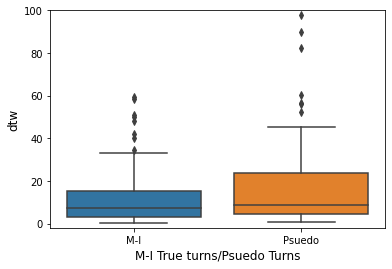

In [38]:
xxx=[None]*(len(dtwt)+len(dtwr1))
for i in range(len(dtwt)):
    xxx[i]="M-I"
for i in range(len(dtwt),len(dtwt)+len(dtwr1)):
    xxx[i]="Psuedo"
compare_dtwt=np.r_[dtwt[:,0],dtwr1[:,0]]      
ax = sns.boxplot(x=xxx, y=compare_dtwt, linewidth=1.5,whis=1.5)
plt.xlabel('M-I True turns/Psuedo Turns', fontsize=12)
plt.ylabel('dtw',fontsize=12)
plt.ylim(-2,100)
#plt.title('Vocal exchange/Non-vocal exchange')
plt.show()

In [39]:
dtwtc=np.r_[dtwdc1,dtwdc2,dtwdc6,dtwdc7,dtwdc8,dtwdc9]
dtwr1c=np.r_[r1fac,r2fac,r6fac,r7fac,r8fac,r9fac]

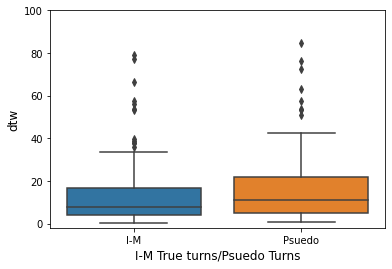

In [40]:
xxx=[None]*(len(dtwtc)+len(dtwr1c))
for i in range(len(dtwtc)):
    xxx[i]="I-M"
for i in range(len(dtwtc),len(dtwtc)+len(dtwr1c)):
    xxx[i]="Psuedo"
compare_dtwtc=np.r_[dtwtc[:,0],dtwr1c[:,0]]
ax = sns.boxplot(x=xxx, y=compare_dtwtc, linewidth=1.5,whis=1.5)
plt.ylim(-2,100)
plt.xlabel('I-M True turns/Psuedo Turns', fontsize=12)
plt.ylabel('dtw',fontsize=12)
#plt.title('Vocal exchange/Non-vocal exchange')
plt.show()